<a href="https://colab.research.google.com/github/Syaroful/syaroful-ml-semester-5/blob/main/07%20-%20Clustering/tugas_praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhamad Syaroful Anam | TI - 3G | 2141720108

# **K-Means Clustering**

**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester_5/Machine Learaning/Jobsheet/Jobsheet 7: Clustering/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df = df.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
# Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

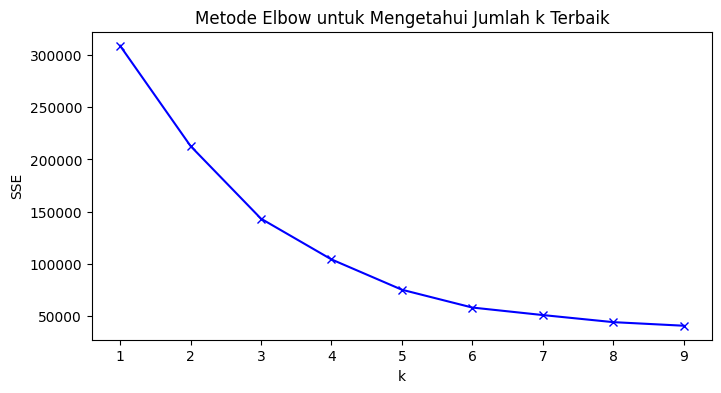

In [11]:
# Feature selection
X = df.iloc[:, 1:]

# Implementasi Meode Elbow

sse = []

K = range(1,10)

for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [12]:
# Modeling

km_model = KMeans(n_clusters=4)
km_model.fit(X)
km_model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [13]:
df['Cluster'] = km_model.labels_
df.head(100)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,3
...,...,...,...,...,...
95,1,24,60,52,3
96,0,47,60,47,3
97,0,27,60,50,3
98,1,48,61,42,3


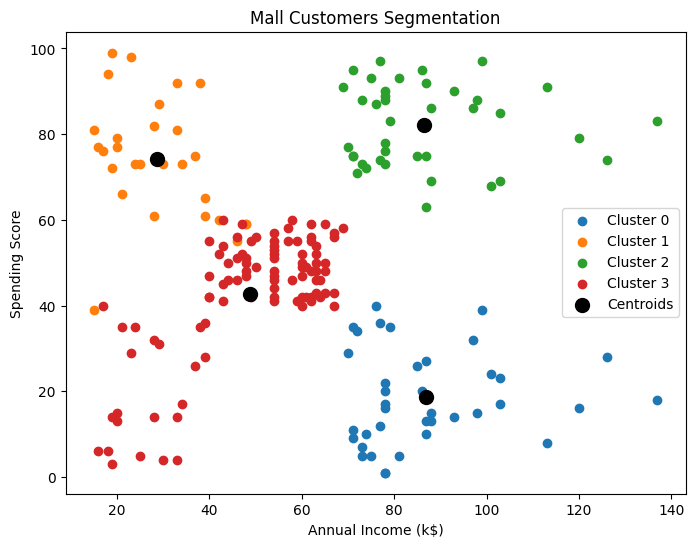

In [15]:
# Visualisasi klaster

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

for i in range(4):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {i}')

plt.scatter(km_model.cluster_centers_[:, 1], km_model.cluster_centers_[:, 2], s=100, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Mall Customers Segmentation')
plt.show()

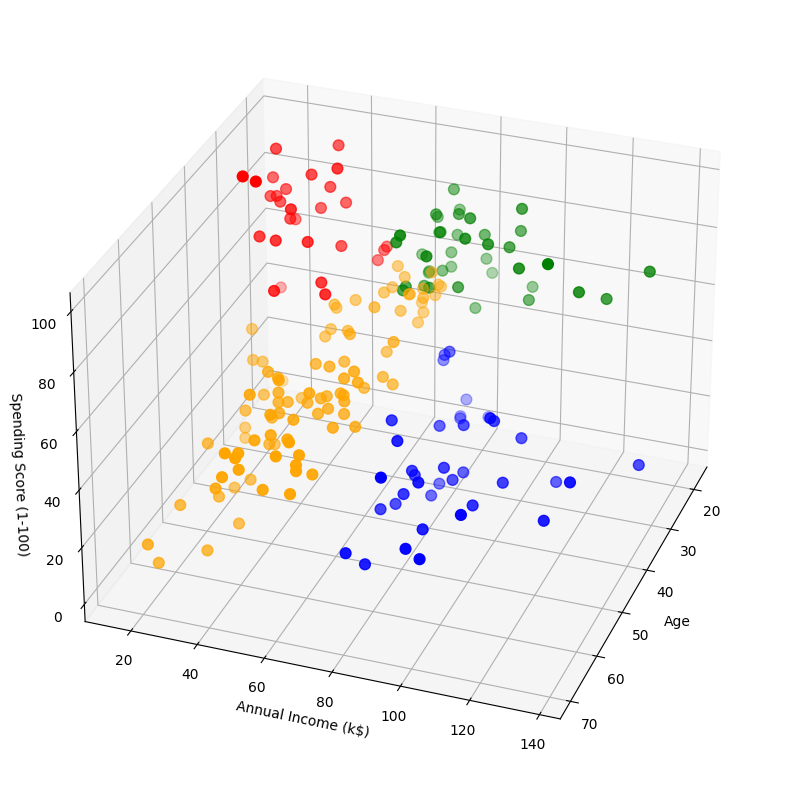

In [16]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=60)
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=60)
ax.view_init(elev=30, azim=20)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# **Image Segementation SOM**

In [19]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=3a8218a155480af730708382245d8b95c70b20e2271e70464a101903d59eb5e9
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [20]:
# import Libraries
import cv2 as cv
import numpy as np
from minisom import MiniSom
from PIL import Image

In [22]:
# Load image

image_path = "/content/drive/MyDrive/Kuliah/Semester_5/Machine Learaning/Jobsheet/Jobsheet 7: Clustering/eagle.jpg"
img = Image.open(image_path)
img_data = np.asarray(img)
img_data = img_data / 255.0  # Normalize pixel values to [0, 1]

In [23]:
flat_img_data = img_data.reshape(-1, 3)

In [24]:
som_dim = 10
som = MiniSom(som_dim, som_dim, 3, sigma=0.3, learning_rate=0.5)

In [25]:
som.train_random(flat_img_data, 100)
segmented_img = np.zeros_like(flat_img_data)

In [26]:
for i, x in enumerate(flat_img_data):
    winner = som.winner(x)
    weights = som.get_weights()[winner[0], winner[1]]
    segmented_img[i] = weights

In [27]:
segmented_img = segmented_img.reshape(img_data.shape)

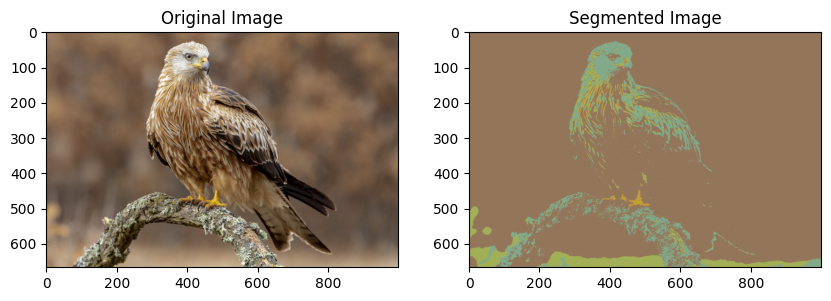

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()